# Mini-batch Gradient Descent

In [1]:
# necessary functions we'll need
import math
import random

'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns

returns the refined parameters & r^2
'''
def linear_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = []):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # returns y-hat
    def prediction(input_list):
        result = params[0] # the bias

        for i in range(len(input_list)):
            result += params[i + 1] * input_list[i] # coefficient * input
        
        return result # y-hat
    
    # returns sum of residuals
    def sum_residuals(multiplier_index = -1):
        
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error



    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += 2 * alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            params[i] += 2 * alpha * sum_residuals(i - 1) / n

    # defining r^2
    sse, sst = 0, 0
    y_average = sum(y_data) / n

    for i in range(n):
        sse += (y_data[i] - prediction(x_data[i]))**2
        sst += (y_data[i] - y_average)**2

    r2 = 1 - (sse/sst)

    return (params, r2) # returns params & r^2




'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns

returns the refined parameters & r^2
'''
def logistic_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = []):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # return y-hat
    def prediction(input_list):
        polynomial = params[0]

        for i in range(len(input_list)):
            polynomial += params[i + 1] * input_list[i] # coefficient * input

        return 1 / (1 + (math.e**(-1 * polynomial))) # logistic function
    
    # return sum of residuals
    def sum_residuals(multiplier_index = -1):
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error
    
    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            params[i] += alpha * sum_residuals(i - 1) / n

    return params




'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
sample_rate: float in the range (0, 1) that determines the proportion of data to be sampled
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns
setting: determines if mini-batch will used linear or logistic regression model

returns the refined parameters & r^2
'''
def mini_batch_gradient_descent(x_data, y_data, sample_rate, alpha = 0.02, epochs = 100, params = [], setting = 'linear'):
    # first combine x & y dataset
    combined = [(x_data[i], y_data[i]) for i in range(len(x_data))]
    n = math.floor(len(x_data) * sample_rate) # the number of samples

    for i in range(epochs):
        curr_sample = random.sample(combined, n) # take n random sample of the combined dataset
        curr_x_sample = [curr_sample[i][0] for i in range(n)]
        curr_y_sample = [curr_sample[i][1] for i in range(n)]

        # learn from current sample
        if setting == 'linear':
            params = linear_regression(curr_x_sample, curr_y_sample, alpha, epochs=1, params=params)[0]
        elif setting == 'logistic':
            params = logistic_regression(curr_x_sample, curr_y_sample, alpha, epochs=1, params=params)

    return params

In [5]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

actual function: y = 4.084309299735081 + 1.9603115615013207x


C:\Users\alfon\AppData\Local\Temp\ipykernel_41172\3161437850.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')
C:\Users\alfon\AppData\Local\Temp\ipykernel_41172\3161437850.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


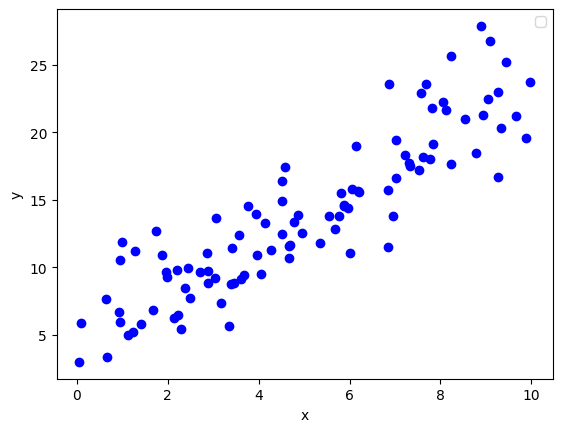

In [13]:
# creating our data points

mu = 0
sigma = 2.3
num_samples = 100

rng = np.random.default_rng()
sample_differences = rng.normal(loc=mu, scale=sigma, size=num_samples)




actual_a = np.random.normal(loc=5, scale=1.2, size=1)
actual_b = np.random.normal(loc=0, scale=2.3, size=1)
actual = lambda x: actual_a[0] + (actual_b[0] * x)

print(f'actual function: y = {float(actual_a)} + {float(actual_b)}x')

df_x = [random.uniform(0, 10) for i in range(num_samples)]
df_y = [actual(df_x[i]) + sample_differences[i] for i in range(num_samples)]



plt.scatter(df_x, df_y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')

plt.show()

In [15]:
# running batch & mini-batch gradient descent and recording parameter history

num_iterations = 100

batch_param_hist = []
curr_batch_param = []

mini_batch_param_hist = []
curr_mini_batch_param = []

for i in range(num_iterations):
    curr_batch_param = linear_regression(df_x, df_y, epochs=1, params=curr_batch_param)[0]
    batch_param_hist.append(curr_batch_param[:]) # record resulting params after a single run

    curr_mini_batch_param = mini_batch_gradient_descent(df_x, df_y, sample_rate=0.25, epochs=1, params=curr_mini_batch_param, setting='linear')
    mini_batch_param_hist.append(curr_mini_batch_param[:])

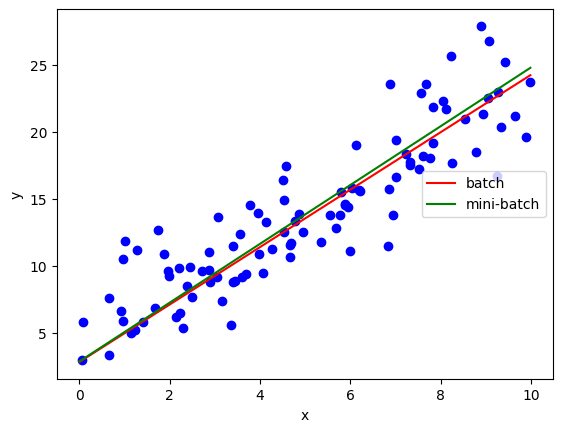

In [17]:
# plotting regression lines

x_list = [x/100 for x in range(0, 1000)]
batch_regression = [curr_batch_param[0] + (x * curr_batch_param[1]) for x in x_list]
mini_batch_regression = [curr_mini_batch_param[0] + (x * curr_mini_batch_param[1]) for x in x_list]

plt.scatter(df_x, df_y, color='blue')
plt.plot(x_list, batch_regression, color='red', label='batch')
plt.plot(x_list, mini_batch_regression, color='green', label='mini-batch')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='right')

plt.show()

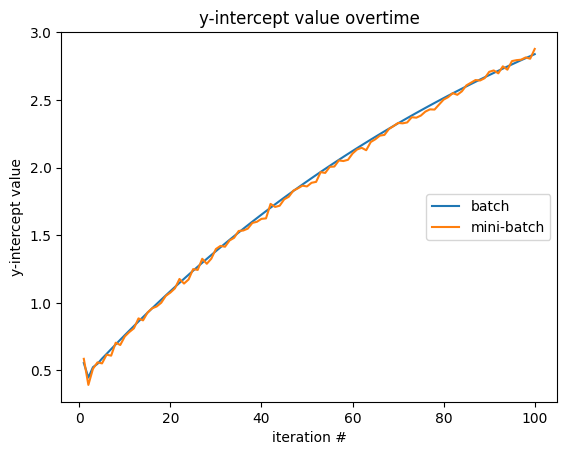

In [20]:
# y-intercept history

plt.plot([i + 1 for i in range(num_iterations)], [batch_param_hist[i][0] for i in range(num_iterations)], label='batch')
plt.plot([i + 1 for i in range(num_iterations)], [mini_batch_param_hist[i][0] for i in range(num_iterations)], label='mini-batch')
plt.xlabel('iteration #')
plt.ylabel('y-intercept value')
plt.title('y-intercept value overtime')
plt.legend(loc='right')

plt.show()

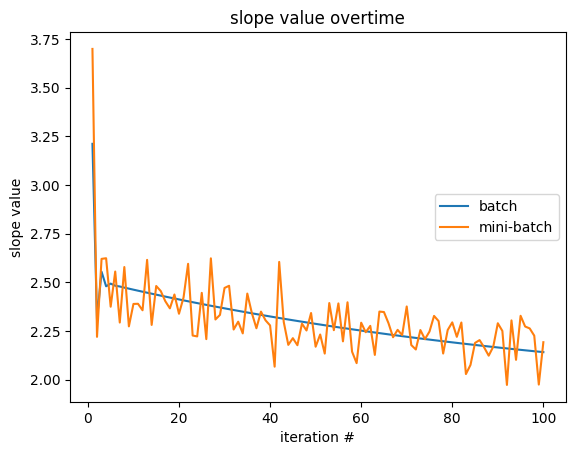

In [21]:
# slope history

plt.plot([i + 1 for i in range(num_iterations)], [batch_param_hist[i][1] for i in range(num_iterations)], label='batch')
plt.plot([i + 1 for i in range(num_iterations)], [mini_batch_param_hist[i][1] for i in range(num_iterations)], label='mini-batch')
plt.xlabel('iteration #')
plt.ylabel('slope value')
plt.title('slope value overtime')
plt.legend(loc='right')

plt.show()